In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load your dataset
reddit_df = pd.read_csv("data/reddit_top2000_posts_per_subreddit.csv")

# Ensure date is in datetime format
reddit_df['created_utc'] = pd.to_datetime(reddit_df['created_utc'], errors='coerce')
reddit_df['title'] = reddit_df['title'].fillna('').astype(str)
reddit_df['text'] = reddit_df['text'].fillna('').astype(str)

In [3]:
# Dataset shape
print("Shape:", reddit_df.shape)

Shape: (11933, 9)


In [4]:
# Display the first few rows of the dataframe
reddit_df.head()

,subreddit,id,title,text,author,score,num_comments,created_utc,url
0,depression,cd0hjp,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",NaN,6675,345,2019-07-14 07:53:40,https://www.reddit.com/r/depression/comments/c...
1,depression,i3ajk8,I hate that people don’t understand that i don...,,Nathanvic13,4728,257,2020-08-04 01:57:38,https://www.reddit.com/r/depression/comments/i...
2,depression,ccaxvm,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",coolmast3r,4423,218,2019-07-12 13:36:38,https://www.reddit.com/r/depression/comments/c...
3,depression,g9ndgw,"It’s like I died at 15, but my body just kept ...",I’m trapped inside. Does anyone else get that ...,thecruelandthecrazy,4176,306,2020-04-28 13:40:28,https://www.reddit.com/r/depression/comments/g...
4,depression,dpl4bu,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,D6uglh7cu,4097,347,2019-10-31 09:36:19,https://www.reddit.com/r/depression/comments/d...


In [5]:
# Display the last few rows of the dataframe
reddit_df.tail()

,subreddit,id,title,text,author,score,num_comments,created_utc,url
11928,socialanxiety,1lmrejp,I accidentally became a regular at my favorite...,They give me extra things and write nice messa...,GamblerJolly,778,51,2025-06-28 16:47:25,https://www.reddit.com/r/socialanxiety/comment...
11929,socialanxiety,1jl76dp,"Asked out girl, got mocked","Well, this put me right back in high school.\n...",Hairy-Razzmatazz-927,767,118,2025-03-27 15:53:28,https://www.reddit.com/r/socialanxiety/comment...
11930,socialanxiety,1j6ih1c,"Social anxiety is not ""irrational"" when you're...","How do you even fight this, when there's a lit...",wszechswietlna,712,63,2025-03-08 14:37:35,https://www.reddit.com/r/socialanxiety/comment...
11931,socialanxiety,1lgx8u4,This disorder defeated me.,Social anxiety has destroyed my life. It ruine...,zikarta,682,123,2025-06-21 14:00:43,https://www.reddit.com/r/socialanxiety/comment...
11932,socialanxiety,1m8dt2w,I just saw a man with his penis out and now I ...,I had to go downtown to pick something up at a...,bnnuyprincess,653,45,2025-07-24 19:27:45,https://www.reddit.com/r/socialanxiety/comment...


In [ ]:
# Column types and null values
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   subreddit     11933 non-null  object        
 1   id            11933 non-null  object        
 2   title         11933 non-null  object        
 3   text          11933 non-null  object        
 4   author        9748 non-null   object        
 5   score         11933 non-null  int64         
 6   num_comments  11933 non-null  int64         
 7   created_utc   11933 non-null  datetime64[ns]
 8   url           11933 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 839.2+ KB


In [7]:
# Summary stats for numeric columns
reddit_df.describe()

,score,num_comments,created_utc
count,11933.000000,11933.000000,11933
mean,1204.334786,100.787396,2020-12-17 17:50:40.276627968
min,24.000000,0.000000,2011-05-31 13:51:36
25%,141.000000,26.000000,2020-01-14 12:23:18
50%,739.000000,54.000000,2020-10-28 07:20:56
75%,1684.000000,107.000000,2021-07-28 11:56:10
max,27942.000000,18643.000000,2025-07-25 01:32:19
std,1444.670461,273.940355,NaN


In [8]:
# Count missing values
reddit_df.isnull().sum()

subreddit          0
id                 0
title              0
text               0
author          2185
score              0
num_comments       0
created_utc        0
url                0
dtype: int64

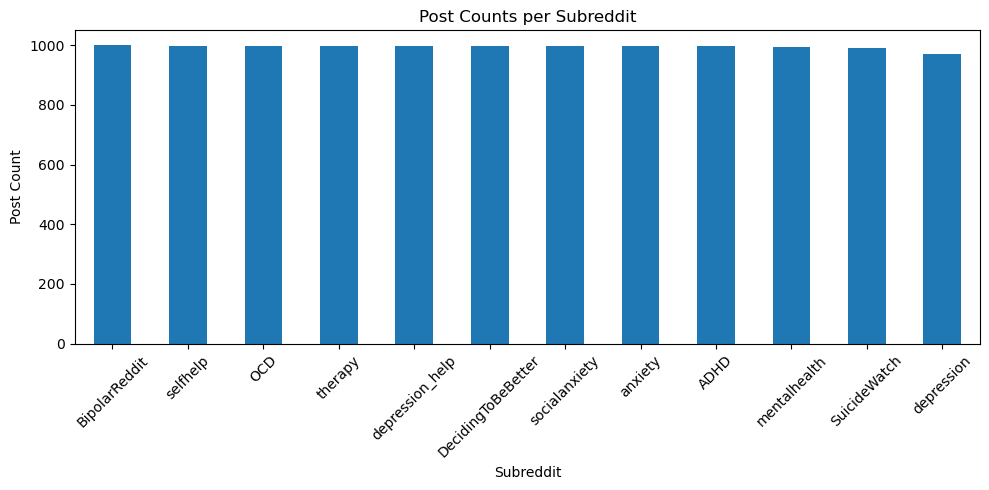

In [9]:
import matplotlib.pyplot as plt

# Count plot by subreddit
reddit_df['subreddit'].value_counts().plot(kind='bar', figsize=(10, 5), title='Post Counts per Subreddit')
plt.xlabel("Subreddit")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top 10 Authors by Post Count'}, ylabel='author'>

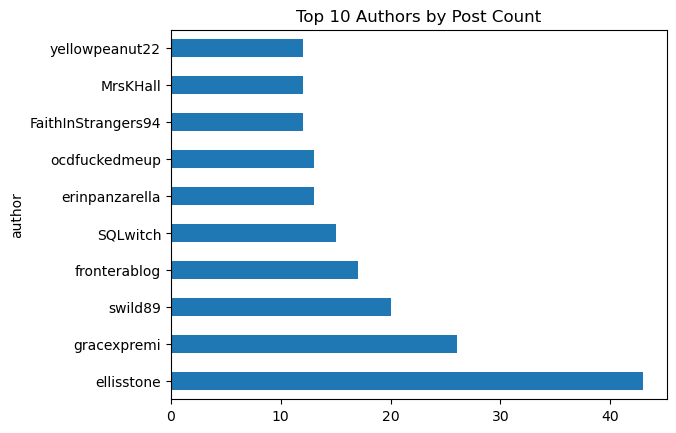

In [10]:
reddit_df['author'].value_counts().head(10).plot(kind='barh', title="Top 10 Authors by Post Count")

<Axes: title={'center': 'Average Score by Subreddit'}, ylabel='subreddit'>

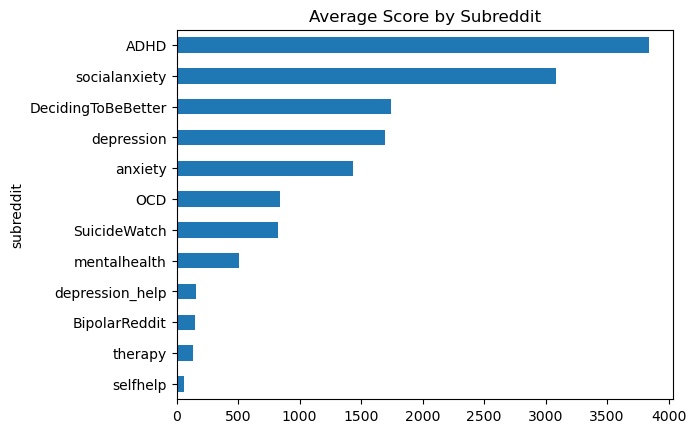

In [11]:
reddit_df.groupby('subreddit')['score'].mean().sort_values().plot(kind='barh', title="Average Score by Subreddit")

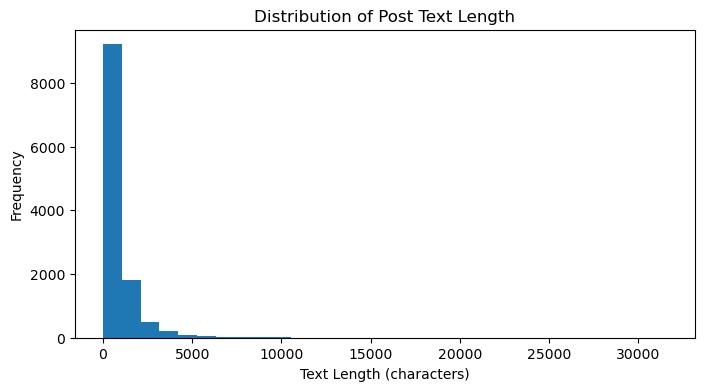

In [12]:
# Add new column: text length
reddit_df['text_length'] = reddit_df['text'].fillna('').apply(len)

# Histogram of text lengths
reddit_df['text_length'].plot(kind='hist', bins=30, figsize=(8, 4), title='Distribution of Post Text Length')
plt.xlabel("Text Length (characters)")
plt.show()

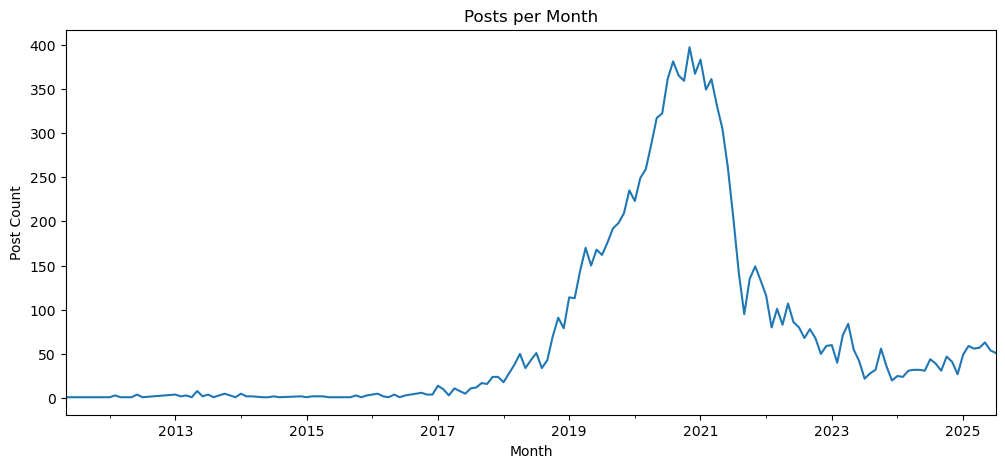

In [13]:
# Convert to datetime if needed
reddit_df['created_utc'] = pd.to_datetime(reddit_df['created_utc'])

# Plot post counts over time
reddit_df['created_utc'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(12, 5), title='Posts per Month')
plt.xlabel("Month")
plt.ylabel("Post Count")
plt.show()

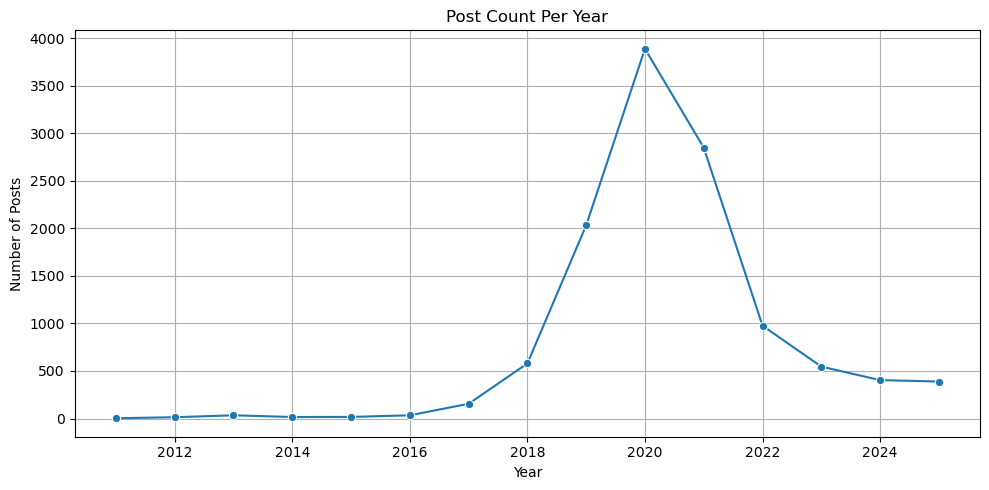

In [14]:
reddit_df['year'] = reddit_df['created_utc'].dt.year
yearly_counts = reddit_df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title('Post Count Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.tight_layout()
plt.show()

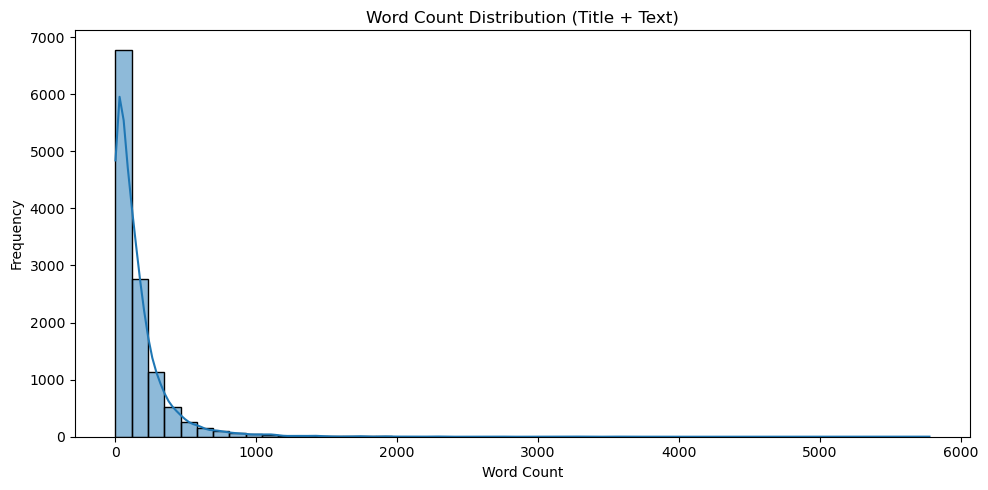

In [15]:
reddit_df['word_count'] = reddit_df['title'].str.split().str.len() + reddit_df['text'].str.split().str.len()

plt.figure(figsize=(10, 5))
sns.histplot(reddit_df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution (Title + Text)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [16]:
from empath import Empath
import pandas as pd

# Initialize Empath
lexicon = Empath()

# Combine text and title
reddit_df['combined_text'] = reddit_df['title'].fillna('') + ' ' + reddit_df['text'].fillna('')

# Select some emotion-relevant categories
selected_categories = [
    'sadness', 'nervousness', 'anger', 'violence', 'suicide', 
    'death', 'pain', 'emotional', 'confusion', 'affection'
]

# Apply Empath analysis row by row
def extract_emotions(text):
    traits = lexicon.analyze(text, categories=selected_categories, normalize=True)
    return pd.Series(traits)

# Apply to top N rows for speed (e.g., 2000)
emotion_df = reddit_df['combined_text'].head(2000).apply(extract_emotions)
reddit_df[selected_categories] = emotion_df

# Save for later use if needed
reddit_df.to_csv("data/reddit_with_emotions.csv", index=False)

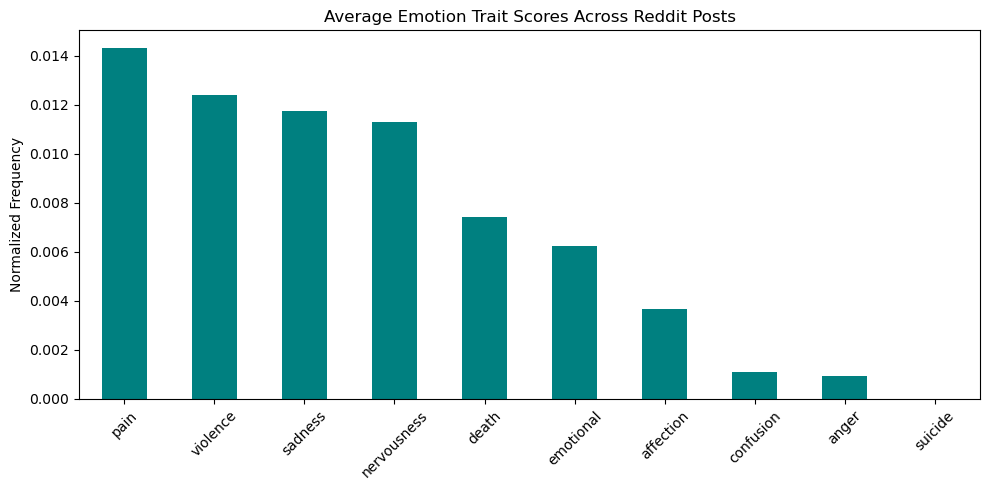

In [17]:
import matplotlib.pyplot as plt

# Mean emotion scores across all posts
mean_emotions = reddit_df[selected_categories].mean().sort_values(ascending=False)

# Bar plot
mean_emotions.plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Average Emotion Trait Scores Across Reddit Posts")
plt.ylabel("Normalized Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a mapping of selected Empath categories to valence & arousal
circumplex_map = {
    'sadness': (-0.8, -0.5),
    'nervousness': (-0.6, 0.7),
    'anger': (-0.9, 0.6),
    'violence': (-0.9, 0.7),
    'suicide': (-1.0, -0.3),
    'death': (-0.9, -0.4),
    'pain': (-0.8, 0.1),
    'emotional': (-0.2, 0.3),
    'confusion': (-0.5, 0.4),
    'affection': (0.7, 0.4)
}

# Convert to DataFrame
circum_df = pd.DataFrame.from_dict(circumplex_map, orient='index', columns=['valence', 'arousal'])
circum_df.index.name = 'trait'
circum_df.reset_index(inplace=True)

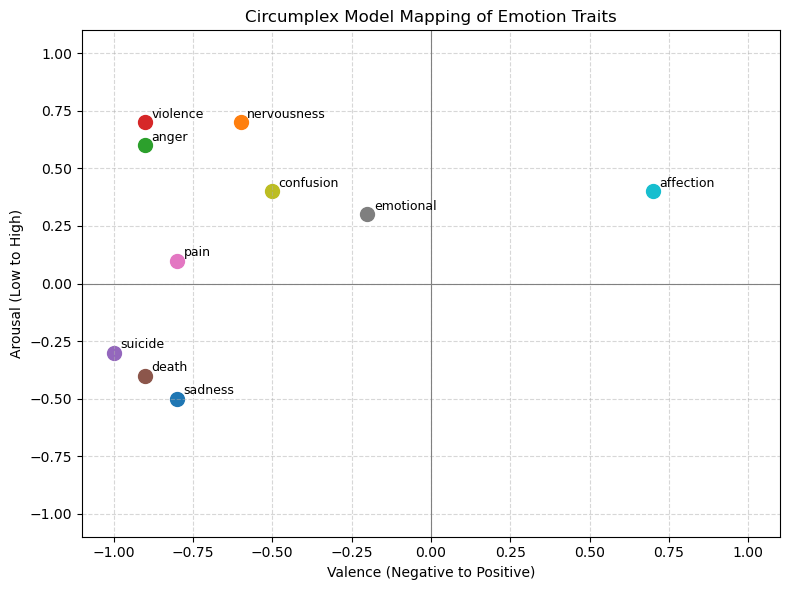

In [19]:
plt.figure(figsize=(8, 6))

# Scatter plot
for _, row in circum_df.iterrows():
    plt.scatter(row['valence'], row['arousal'], s=100, label=row['trait'])
    plt.text(row['valence'] + 0.02, row['arousal'] + 0.02, row['trait'], fontsize=9)

# Axes formatting
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Valence (Negative to Positive)')
plt.ylabel('Arousal (Low to High)')
plt.title('Circumplex Model Mapping of Emotion Traits')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
# Only using the 10 traits we analyzed
selected_traits = [
    'sadness', 'nervousness', 'anger', 'violence', 'suicide',
    'death', 'pain', 'emotional', 'confusion', 'affection'
]

# Calculate average score across all posts
avg_trait_scores = reddit_df[selected_traits].mean().rename('avg_score')

# Merge with circumplex map
circum_df = pd.DataFrame.from_dict({
    'sadness': (-0.8, -0.5),
    'nervousness': (-0.6, 0.7),
    'anger': (-0.9, 0.6),
    'violence': (-0.9, 0.7),
    'suicide': (-1.0, -0.3),
    'death': (-0.9, -0.4),
    'pain': (-0.8, 0.1),
    'emotional': (-0.2, 0.3),
    'confusion': (-0.5, 0.4),
    'affection': (0.7, 0.4)
}, orient='index', columns=['valence', 'arousal'])

circum_df.index.name = 'trait'
circum_df.reset_index(inplace=True)

# Merge average score
circum_df['avg_score'] = circum_df['trait'].map(avg_trait_scores)

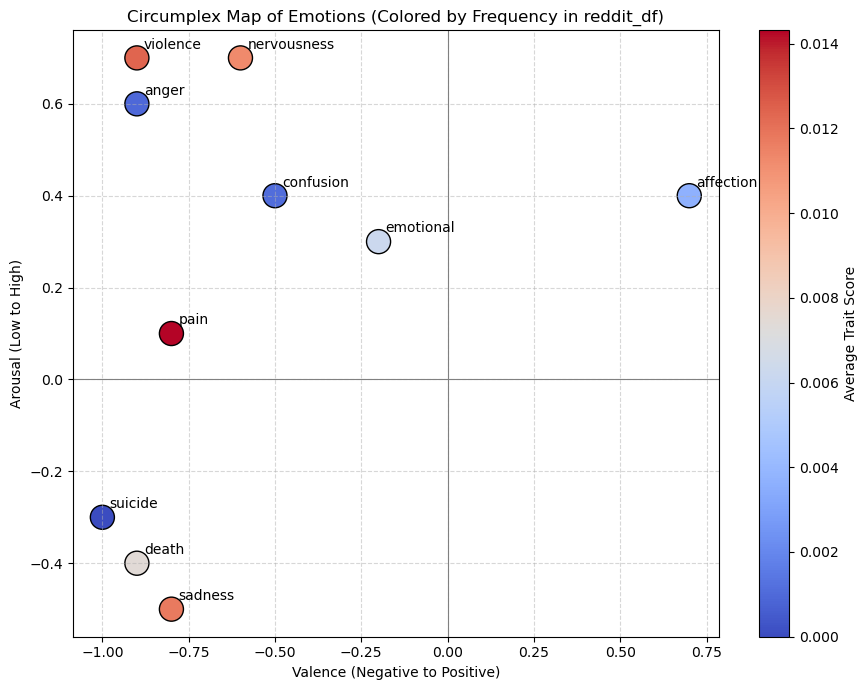

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

# Color intensity reflects average strength of trait in your data
scatter = plt.scatter(
    circum_df['valence'], 
    circum_df['arousal'], 
    c=circum_df['avg_score'], 
    cmap='coolwarm', 
    s=300, 
    edgecolor='black'
)

# Annotate each point
for _, row in circum_df.iterrows():
    plt.text(row['valence'] + 0.02, row['arousal'] + 0.02, row['trait'], fontsize=10)

# Add axes
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

plt.colorbar(scatter, label='Average Trait Score')
plt.title('Circumplex Map of Emotions (Colored by Frequency in reddit_df)')
plt.xlabel('Valence (Negative to Positive)')
plt.ylabel('Arousal (Low to High)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
# Add quadrant labels
def label_quadrant(row):
    if row.valence >= 0 and row.arousal >= 0:
        return "Positive & High Arousal"
    elif row.valence >= 0 and row.arousal < 0:
        return "Positive & Low Arousal"
    elif row.valence < 0 and row.arousal >= 0:
        return "Negative & High Arousal"
    else:
        return "Negative & Low Arousal"

circum_df['quadrant'] = circum_df.apply(label_quadrant, axis=1)

# Group by quadrant
quad_summary = circum_df.groupby('quadrant')[['trait', 'avg_score']].apply(
    lambda df: df.sort_values(by='avg_score', ascending=False)
).reset_index(drop=True)

# Display summary table
import pandas as pd
from IPython.display import display
display(quad_summary)

,trait,avg_score
0,pain,0.014312
1,violence,0.012401
2,nervousness,0.011286
3,emotional,0.006247
4,confusion,0.001109
5,anger,0.000933
6,sadness,0.011744
7,death,0.007411
8,suicide,0.000000
9,affection,0.003678
